# Part 4: Computer-Aided Cell Factory Engineering

## 4.1 Reconstruction of Existing GSM

#### First, create a draft GSM reconstruction using CarveMe. Then create a report for the model.

In [4]:
%%time

!carve --refseq GCF_000009725.1 --output Synechocystis_sp_PCC_6803.xml
# Problem! This organism is not expected to grow on LB media, so we must define the media ourselves. Usually BG-11 media.

!memote report snapshot Synechocystis_sp_PCC_6803.xml --filename Synechocystis_sp_PCC_6803.html

File exists, skipping.


diamond v2.0.15.153 (C) Max Planck Society for the Advancement of Science
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: 
Percentage range of top alignment score to report hits: 10
Opening the database...  [0.082s]
Database: c:\program files\python37\lib\site-packages\carveme/data/generated/bigg_proteins.dmnd (type: Diamond database, sequences: 26727, letters: 11170577)
Block size = 2000000000
Opening the input file...  [0.063s]
Opening the output file...  [0s]
Loading query sequences...  [0.013s]
Masking queries...  [0.025s]
Algorithm: Double-indexed
Building query histograms...  [0.049s]
Allocating buffers...  [0s]
Loading reference sequences...  [0.025s]
Masking reference...  [0.184s]
Initializing temporary storage...  [0.029s]
Building reference histograms...  [0.

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
============================= test session starts =============================
platform win32 -- Python 3.7.0, pytest-7.2.0, pluggy-1.0.0
rootdir: c:\
plugins: anyio-3.5.0, dash-1.4.0
collected 146 items / 1 skipped

..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_annotation.py . [  0%]
..FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...F....F.F...F.FF.FFFFFFFFFF..         [ 44%]
Wall time: 5min 31s..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_basic.py . [ 45%]


c:\program files\python37\lib\site-packages\dash\testing\plugin.py:17: UserWarning:

run `pip install dash[testing]` if you need dash.testing

Writing snapshot report to 'Synechocystis_sp_PCC_6803.html'.



.....F........F.FFFFFF                                                   [ 60%]
..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_biomass.py . [ 60%]
F.......F                                                                [ 67%]
..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_consistency.py . [ 67%]
..ssssssssssssssssFFFF.F.FFF                                             [ 86%]
..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_essentiality.py s [ 87%]
                                                                         [ 87%]
..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_growth.py s [ 88%]
                                                                         [ 88%]
..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_matrix.py . [ 89%]
...                                                                      [ 91

#### Next, load a pre-built model found in literature and create a report for that model.

In [2]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

model = read_sbml_model('iSynCJ816.xml')
model #Joshi_etal_2017

No objective coefficients in model. Unclear what should be optimized


Name,iSynCJ816
Memory address,0x019345bf13c8
Number of metabolites,928
Number of reactions,1044
Number of groups,0
Objective expression,0
Compartments,"cytosol, periplasm, extracellular space, peroxisome/glyoxysome, thylakoid, lysosome, cytochrome complex"


In [7]:
%%time
!memote report snapshot iSynCJ816.xml --filename iSynCJ816.html

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
============================= test session starts =============================
platform win32 -- Python 3.7.0, pytest-7.2.0, pluggy-1.0.0
rootdir: c:\
plugins: anyio-3.5.0, dash-1.4.0
collected 164 items / 1 skipped

..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_annotation.py . [  0%]
..FFFFFFFFF.FFFFF.FFFFFFFFFFFFFFF..FF..F...F....FFF.FFFFFFFFFF..         [ 39%]
..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_basic.py . [ 40%]
.....F........F...F.FF                                                   [ 53%]
..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_biomass.py . [ 54%]
FFF...............FFFFFFFFF                                              [ 70%]
..\..\..\..\..\..\program files\python37\lib\site-packages\memote\suite\tests\test_consistency.py F [ 71%]
FFsssssss

error: No objective coefficients in model. Unclear what should be optimized
c:\program files\python37\lib\site-packages\dash\testing\plugin.py:17: UserWarning:

run `pip install dash[testing]` if you need dash.testing

Writing snapshot report to 'iSynCJ816.html'.


#### Comments on differences between the reconstruction and published model

## 4.2 Addition of Heterologous Pathways for p-coumaric acid

In [3]:
# Pathways are described in Gao et al 2021.

# define metabolites
trans_Cinnamate = Metabolite(id = 'TRCI', compartment='c', name='trans-Cinnamate', formula='C9H8O2')
p_Coumaric_acid = Metabolite(id = 'PCOU', compartment='c', name='p-Coumaric acid', formula='C9H8O3')

# define reactions
phenylalanine_ammonia_lyase = Reaction('PAL') # R00697
trans_cinnamate_4_monooxygenase = Reaction('CYP73A') # R02253

# add metabolites to reactions
phenylalanine_ammonia_lyase.add_metabolites(({model.metabolites.phe__L_c : -1,
                                              trans_Cinnamate: 1,
                                              model.metabolites.nh3_c: 1
                                             }))
trans_cinnamate_4_monooxygenase.add_metabolites(({model.metabolites.o2_c : -1,
                                                  trans_Cinnamate: -1,
                                                  model.metabolites.nadph_c : -1,
                                                  p_Coumaric_acid: 1,
                                                  model.metabolites.h2o_c: 1,
                                                  model.metabolites.nadph_c : 1,
                                                 }))

# add reactions to model
model.add_reactions([phenylalanine_ammonia_lyase])
model.add_reactions([trans_cinnamate_4_monooxygenase])
model.add_boundary(model.metabolites.TRCI, type='demand') # demand reaction because metabolites are intracellular
model.add_boundary(model.metabolites.PCOU, type='demand') # demand reaction because metabolites are intracellular

# set model objective to maximize P-Coumaric acid
model.objective = 'PAL'

## 4.3 Theoretical Maximum Yield

#### For default media (specified in pre-built model):

In [4]:
pcou_rate = model.optimize().objective_value # AKA productivity
print('The maximum rate of p-coumaric acid is:  ', pcou_rate, 'mmol/gDW*h')

# Must define yield.  Versus sunlight? 50 umol photons/m2/s is common in Gao 2021. Try CO2 instead. More sensible.
# The model includes the exchange reaction for CO2, EX_co2_e.
max_yield = pcou_rate / (model.reactions.EX_co2_e.flux)
print('Maximum theoretical yield:  ', max_yield, 'mmol-pcou/mmol-co2')

The maximum rate of p-coumaric acid is:   0.51 mmol/gDW*h
Maximum theoretical yield:   0.5 mmol-pcou/mmol-co2


#### For BG-11 media (typical medium for Synechocystis as used by Gao 2021):

The model built by Joshi et al 2017 includes the default medium choice, but the typical medium for Synechocystis cultivation, that was also used by Gao 2021, is BG-11. Add BG-11 into the model. BG-11 components: https://utex.org/products/bg-11-medium?variant=30991786868826 Of the 10 components comprising BG-11, only some (8) are found in the exchange reactions: sodium nitrate, sodium EDTA, sodium carbonate, dipotassium phosphate, magnesium sulfate, calcium chloride, citric acid, and ferric ammonium citrate.

In [ ]:
# useful functions for cross-checking reactions and metabolites
# model.medium
# model.exchanges
# model.metabolites.query('na')
# model.reactions.get_by_id('EX_co2_e')
# model.metabolites.get_by_id('cit_e')
# model.slim_optimize() # returns just objective value, not entire solution object

In [5]:
BG11 = {} # medium is a dictionary of exchange fluxes and their upper bounds

# components comprising BG-11 medium
BG11['EX_na1_e'] = 10 # from sodium nitrate, sodium EDTA, sodium carbonate
BG11['EX_k_e'] = 10 # from potassium phosphate
BG11['EX_pi_e'] = 10 # from dipotassium phosphate
BG11['EX_h_e'] = 10 # from dipotassium phosphate
BG11['EX_mg2_e'] = 10 # magnesium sulfate
BG11['EX_ca2_e'] = 10 # from calcium chloride
BG11['EX_cit_e'] = 10 # from citric acid
BG11['EX_fe3_e'] = 10 # from ferric ammonium citrate
BG11['EX_nh4_e'] = 10 # from ferric ammonium citrate
BG11['EX_no3_e'] = 10 # from sodium nitrate
BG11['EX_hco3_e'] = 10 # from sodium carbonate

# other components in typical cultivations
#BG11['EX_co2_e'] = 10 # ambient carbon dioxide
#BG11['EX_o2_e'] = 0 # ambient oxygen, it's a photoautotroph
BG11['EX_photon_e'] = 10000 # light

#print(BG11)
model.medium = BG11

# set correct exchange reaction limits
#model.reactions.EX_o2_e.bounds = -1000, 999999 # oxygen is released during photosynthesis

In [6]:
from cobra.medium import minimal_medium

print('For BG-11 media...\n')

pcou_rate = model.optimize().objective_value # AKA productivity
print('Maximum rate of p-coumaric acid is:  ', pcou_rate, 'mmol/gDW*h')
max_yield = pcou_rate / (model.reactions.EX_co2_e.flux)
print('Maximum theoretical yield:  ', max_yield, 'mmol-pcou/mmol-co2')

print('\nThe composition of the minimal media to achieve the maximum productivity is:  ')
minimal_medium(model, pcou_rate, minimize_components=8, open_exchanges=False)

For BG-11 media...

Maximum rate of p-coumaric acid is:   122.5049701789264 mmol/gDW*h
Maximum theoretical yield:   0.8032850997262417 mmol-pcou/mmol-co2

The composition of the minimal media to achieve the maximum productivity is:  


EX_cit_e          10.0
EX_h_e            10.0
EX_photon_e    10000.0
dtype: float64

In [ ]:
%%time
!memote report snapshot model --filename pcou_syn.html

#### Further optimization: Focus on CO2, oxygen, and light?

## 4.4 Phenotypic Phase Planes

We know that Synechocystis is a photosynthetic organism, so the main process conditions we should explore in the phenotypic phase planes are light and CO2 levels.  Based on the minimal media analysis, we may also want to see phenotypic phase planes for citrate and pH. The objective for each should be p-coumaric acid production rate, rather than biomass formation, because it is an extracellular product.

In [7]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope, _add_envelope

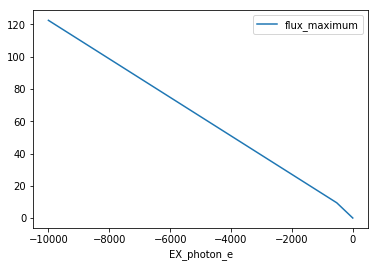

In [9]:
# For photons
ppp_pcou = production_envelope(model,
                               reactions=[model.reactions.EX_photon_e],
                               objective=model.reactions.PAL)
ppp_pcou.plot(x='EX_photon_e', y='flux_maximum')

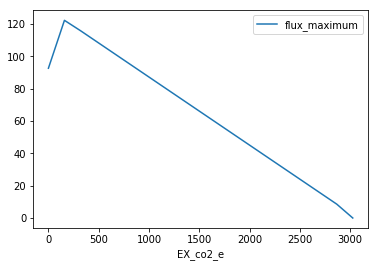

In [13]:
# For CO2
ppp_pcou = production_envelope(model,
                               reactions=[model.reactions.EX_co2_e],
                               objective=model.reactions.PAL)
ppp_pcou.plot(x='EX_co2_e', y='flux_maximum')

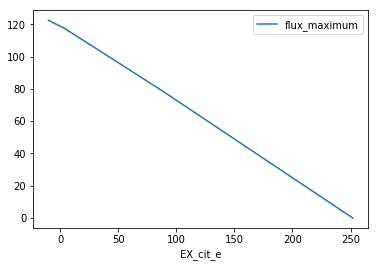

In [14]:
# For Citrate
ppp_pcou = production_envelope(model,
                               reactions=[model.reactions.EX_cit_e],
                               objective=model.reactions.PAL)
ppp_pcou.plot(x='EX_cit_e', y='flux_maximum')

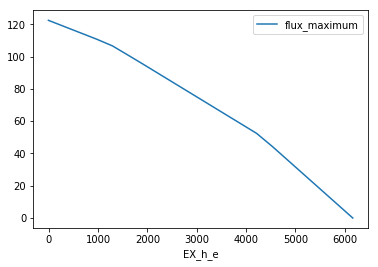

In [15]:
# For H+
ppp_pcou = production_envelope(model,
                               reactions=[model.reactions.EX_h_e],
                               objective=model.reactions.PAL)
ppp_pcou.plot(x='EX_h_e', y='flux_maximum')

###### Comments on what these PPP charts mean?

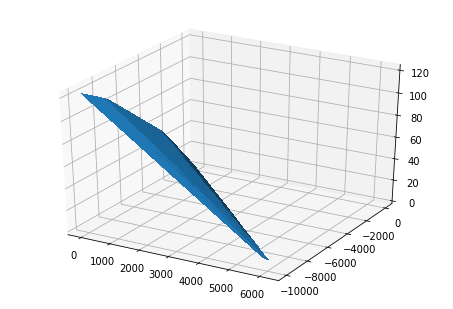

In [80]:
# Combination?
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

ppp_pcou = production_envelope(model,
                               reactions=[model.reactions.EX_h_e,
                                          model.reactions.EX_photon_e],
                               objective=model.reactions.PAL)

fig = plt.figure()
ax = Axes3D(fig)
X = ppp_pcou['EX_h_e'].unique()
Y = ppp_pcou['EX_photon_e'].unique()
Z = ppp_pcou['flux_maximum'].values
Z = Z.reshape(len(X),len(Y))
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False)